In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import bambi as bmb
import arviz as az
import numpy as np

In [2]:
df = pd.read_csv(
"https://media.githubusercontent.com/media/khuyentran1401/Data-science"
    "/master/statistics/bayes_linear_regression/student-score.csv"
)

In [3]:
df.head()

,mat,por
0,5,0
1,5,9
2,7,12
3,15,14
4,6,11


In [4]:
len(df)

382

In [5]:
mat = df['mat']
por = df['por']

ORDINARY LEAST SQUARES LINEAR REGRESSION (OLS)

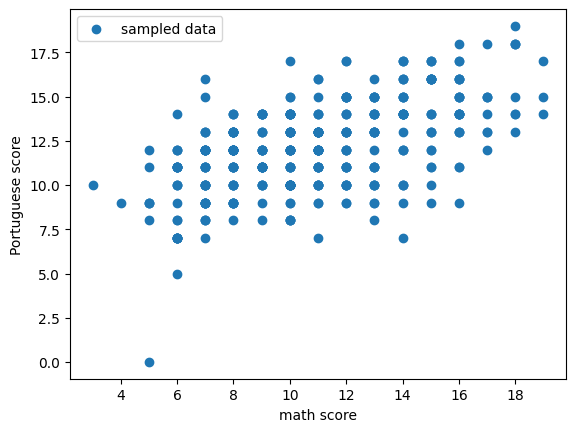

In [6]:
plt.scatter(mat, por, label="sampled data")
plt.xlabel("math score")
plt.ylabel("Portuguese score")
plt.legend(loc=0)
plt.show()

In [7]:
mat, por = df["mat"].values, df["por"].values

In [8]:
linear_model = LinearRegression().fit(mat.reshape(-1,1), por)
predict_line = linear_model.predict(mat.reshape(-1,1))

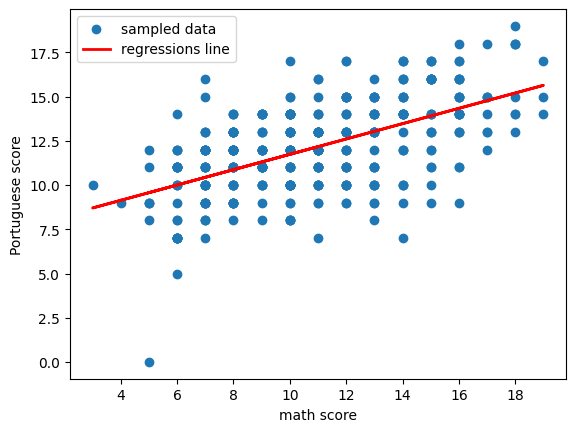

In [9]:
plt.scatter(mat, por, label="sampled data")
plt.plot(mat, predict_line, label = "regressions line", lw=2, color="red")
plt.xlabel("math score")
plt.ylabel("Portuguese score")
plt.legend(loc=0)

In [10]:
linear_model.coef_

array([0.4335796])

In [11]:
linear_model.intercept_

7.403346211071996

In [12]:
#If the math score increases by 1 the average port score increases by 0.43
#could lay a 95% confidence interval on top of it

BAYESION LINEAR REGRESSION MODEL

In [13]:
gauss_model = bmb.Model('por ~ mat', data=df)

In [22]:
gauss_fitted = gauss_model.fit(draws=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [sigma, Intercept, mat]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 403 seconds.


In [23]:
gauss_model.predict(gauss_fitted, kind="response")

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'mat'}>, <Axes: title={'center': 'mat'}>]],
      dtype=object)

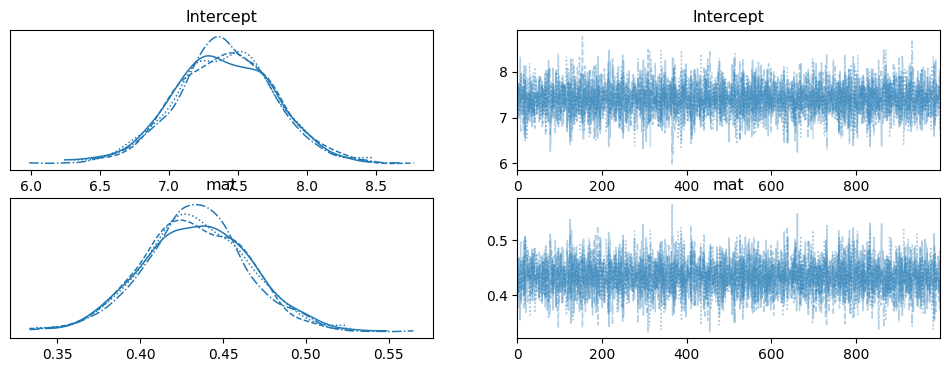

In [24]:
az.plot_trace(gauss_fitted, var_names=["Intercept", "mat"])

In [26]:
#coefficient
gauss_fitted.posterior.mat.values.mean()

0.43353410748071153

In [28]:
#intercept
gauss_fitted.posterior.Intercept.values.mean()

7.404468679330185

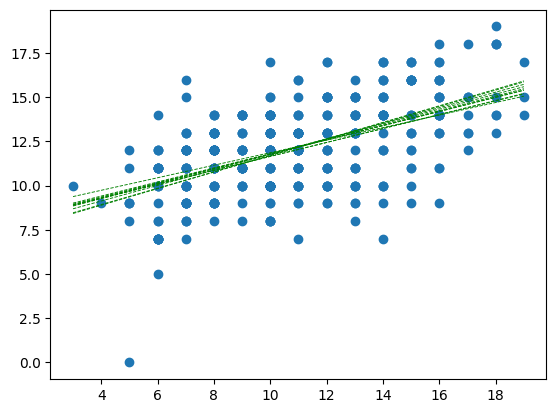

In [34]:
#plot data
plt.scatter(mat, por, label = "sampled data")

# values of x-axis
x_range = np.linspace(min(mat), max(mat), 2000)

#plot sample predictions
for i in range(10):
    y_pred = (gauss_fitted.posterior.mat.values[0,i] * x_range
              + gauss_fitted.posterior.Intercept.values[0,i])
    
    plt.plot(x_range, y_pred,
             color="green", linestyle="--", lw=0.65,
             label = "Mean Regression Line"
             )

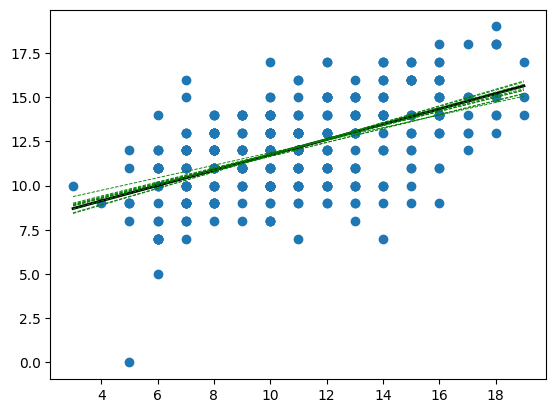

In [39]:
#Plot Data
plt.scatter(mat, por, label= "sampled data")

#Values of x-axis
x_range = np.linspace(min(mat), max(mat), 2000)

y_pred = gauss_fitted.posterior.mat.values.mean() * x_range + gauss_fitted.posterior.Intercept.values.mean()

#Plot mean prediction
plt.plot(
    x_range, y_pred,
    color="black", label="Mean regression line",
    linewidth = 2
)
#plot sample predictions
for i in range(10):
    y_pred = (gauss_fitted.posterior.mat.values[0,i] * x_range
              + gauss_fitted.posterior.Intercept.values[0,i])
    
    plt.plot(x_range, y_pred,
             color="green", linestyle="--", lw=0.65,
             label = "Mean Regression Line"
             )



<Axes: xlabel='por'>

c:\Users\moona\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\moona\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


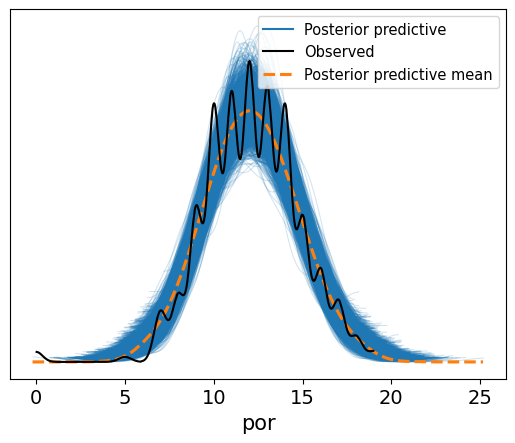

In [40]:
az.plot_ppc(gauss_fitted)

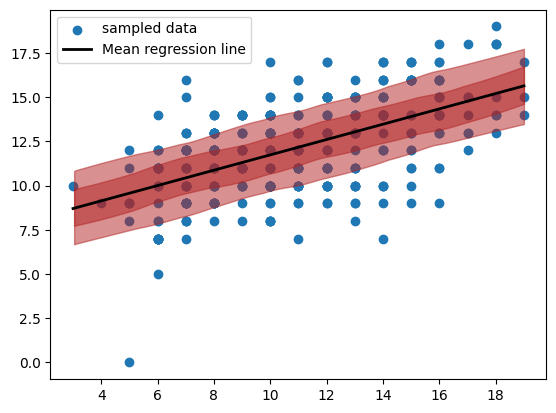

In [44]:
#Plot Data
plt.scatter(mat, por, label= "sampled data")

#Values of x-axis
x_range = np.linspace(min(mat), max(mat), 2000)

y_pred = gauss_fitted.posterior.mat.values.mean() * x_range + gauss_fitted.posterior.Intercept.values.mean()

#Plot mean prediction
plt.plot(
    x_range, y_pred,
    color="black", label="Mean regression line",
    linewidth = 2
)

#PLOT HDIs
for interval in [0.38, 0.68]:
    az.plot_hdi(mat, gauss_fitted.posterior_predictive.por,
                hdi_prob=interval, color="firebrick")
plt.legend(loc=0);


In [ ]:
#If the math score is 10, we can say 38% of the predictions lie between 10.5-ish to 12.5-ish